# 전국 신규 민간 아파트 분향가격 동향 파악

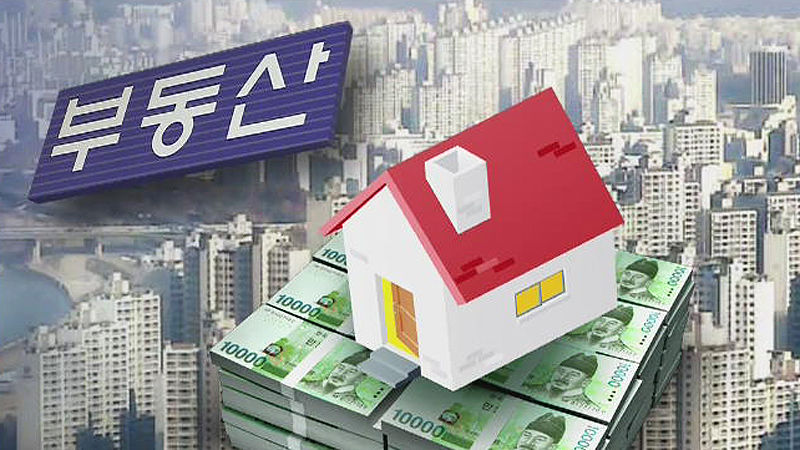

In [116]:
from IPython.display import Image
Image("../picture/200993067_1280.jpg")

# 사용 모듈

In [117]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt 

In [118]:
import warnings
warnings.filterwarnings("ignore")

In [119]:
plt.rc('font',family='Malgun Gothic')

In [120]:
!pip show plotnine

Name: plotnine
Version: 0.10.1
Summary: A grammar of graphics for python
Home-page: https://plotnine.readthedocs.io/en/stable
Author: Hassan Kibirige
Author-email: has2k1@gmail.com
License: MIT
Location: c:\users\pjh23\anaconda3\lib\site-packages
Requires: matplotlib, mizani, numpy, pandas, patsy, scipy, statsmodels
Required-by: 


# 데이터(https://www.data.go.kr/)

In [121]:
pre_sale = pd.read_csv("../data/Real_Estate/apt_price.csv", encoding='euc-kr')
pre_sale.shape

(6375, 5)

In [122]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [123]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
6370,제주,모든면적,2021,12,"6,574"
6371,제주,전용면적 60제곱미터이하,2021,12,"2,862"
6372,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,12,"6,516"
6373,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,12,"5,924"
6374,제주,전용면적 102제곱미터초과,2021,12,"6,493"


In [124]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6375 non-null   object
 1   규모구분        6375 non-null   object
 2   연도          6375 non-null   int64 
 3   월           6375 non-null   int64 
 4   분양가격(제곱미터)  5891 non-null   object
dtypes: int64(2), object(3)
memory usage: 249.1+ KB


In [125]:
pre_sale.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    484
dtype: int64

<AxesSubplot:>

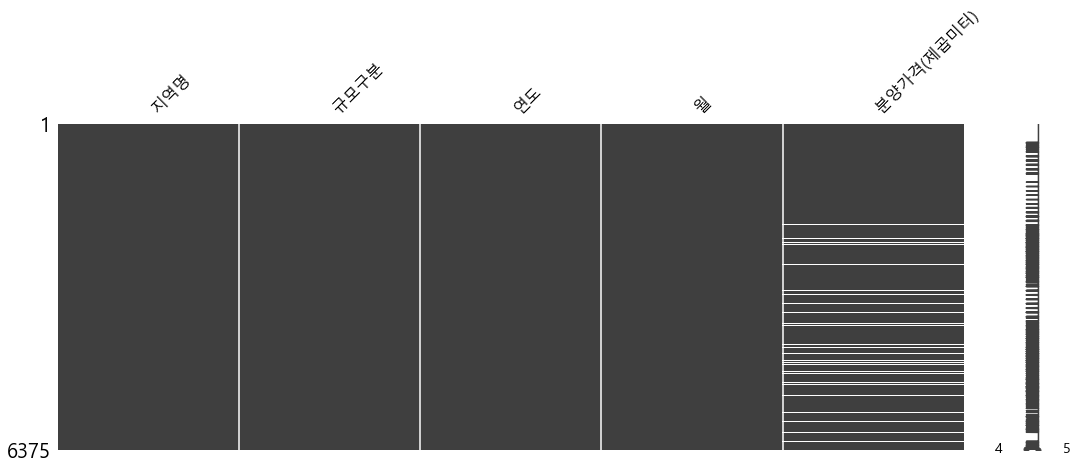

In [126]:
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [127]:
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [128]:
pre_sale_price = pre_sale["분양가격(제곱미터)"]

In [129]:
pre_sale["분양가격(제곱미터)"] = pd.to_numeric(pre_sale_price, errors='coerce')
pre_sale['평당분양가격'] = pre_sale['분양가격(제곱미터)'] * 3.3

In [130]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         6375 non-null   object 
 1   규모구분        6375 non-null   object 
 2   연도          6375 non-null   object 
 3   월           6375 non-null   object 
 4   분양가격(제곱미터)  5548 non-null   float64
 5   평당분양가격      5548 non-null   float64
dtypes: float64(2), object(4)
memory usage: 299.0+ KB


In [131]:
pre_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
평당분양가격        float64
dtype: object

In [132]:
pre_sale.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    827
평당분양가격        827
dtype: int64

In [133]:
pre_sale.describe()

,분양가격(제곱미터),평당분양가격
count,"5,548","5,548"
mean,"3,450","11,385"
std,"1,407","4,642"
min,"1,868","6,164"
25%,"2,567","8,471"
50%,"3,064","10,111"
75%,"3,911","12,906"
max,"13,835","45,656"


In [134]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월
count,6375,6375,6375,6375
unique,17,5,7,12
top,서울,모든면적,2016,10
freq,375,1275,1020,595


In [135]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 6)

In [136]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

모든면적                       1275
전용면적 60제곱미터이하              1275
전용면적 60제곱미터초과 85제곱미터이하     1275
전용면적 85제곱미터초과 102제곱미터이하    1275
전용면적 102제곱미터초과             1275
Name: 규모구분, dtype: int64

In [137]:
pre_sale['지역명'].value_counts()

서울    375
강원    375
경남    375
경북    375
전남    375
전북    375
충남    375
충북    375
세종    375
인천    375
울산    375
대전    375
광주    375
대구    375
부산    375
경기    375
제주    375
Name: 지역명, dtype: int64

In [138]:
# ?를 통해 도움말 보기
# pre_sale.groupby?

In [139]:
# 분양가격만 봤을 때 2015년에서 2021년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도                 2015   2016   2017   2018   2019   2020   2021
분양가격(제곱미터) count    243    984    975    919    912    882    633
           mean   2,789  2,934  3,143  3,327  3,693  3,951  4,108
           std      977  1,071  1,111  1,186  1,563  1,633  1,553
           min    1,868  1,900  1,976  2,076  2,124  2,297  2,409
           25%    2,225  2,282  2,373  2,525  2,636  2,780  3,056
           50%    2,516  2,672  2,838  2,952  3,395  3,734  3,842
           75%    3,026  3,148  3,466  3,698  4,066  4,441  4,566
           max    7,092  8,096  7,887  8,098 12,728 13,835  9,769
평당분양가격     count    243    984    975    919    912    882    633
           mean   9,203  9,683 10,373 10,979 12,188 13,039 13,555
           std    3,224  3,536  3,665  3,914  5,159  5,388  5,126
           min    6,164  6,270  6,521  6,851  7,009  7,580  7,950
           25%    7,342  7,531  7,831  8,332  8,697  9,176 10,085
           50%    8,303  8,818  9,365  9,742 11,204 12,324 12,679
           75%    9,984 10,390 11,438 12,203 13,419 14,655 15,068
           max   23,404 26,717 26,027 26,723 42,002 45,656 32,238

In [140]:
# ?로 도움말 보기
# pre_sale.pivot_table?

In [141]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018,2019,2020,2021
규모구분,,,,,,,
모든면적,"8,893","9,293","9,927","10,676","11,603","12,318","13,571"
전용면적 102제곱미터초과,"9,837","10,389","11,311","11,446","13,332","14,068","14,575"
전용면적 60제곱미터이하,"8,952","9,399","10,271","10,844","11,507","12,401","12,886"
전용면적 60제곱미터초과 85제곱미터이하,"8,892","9,296","9,840","10,651","11,677","12,327","13,459"
전용면적 85제곱미터초과 102제곱미터이하,"9,519","10,122","10,573","11,442","12,981","14,760","13,363"


In [142]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '모든면적']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018,2019,2020,2021
0,강원,"7,160","7,011","7,171","7,681","8,142","9,331","9,680"
1,경기,"10,377","11,220","11,841","13,186","14,469","14,383","14,112"
2,경남,"7,586","7,848","8,164","9,019","9,871","10,161","10,326"
3,경북,"7,171","7,361","7,803","8,505","8,857","9,545","10,251"
4,광주,"8,052","8,899","9,471","9,856","11,823","12,500","13,891"
5,대구,"9,232","10,310","11,507","12,076","13,852","15,145","15,464"
6,대전,"8,098","8,502","9,056","10,180","11,778","11,094","11,698"
7,부산,"10,307","10,430","11,664","12,998","13,116","13,248","14,348"
8,서울,"19,725","20,663","21,425","22,889","26,131","26,910","29,045"
9,세종,"8,750","8,860","9,133","10,355","11,079","11,355","12,538"


In [143]:
region_year['변동액'] = (region_year['2021'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 충남이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 15,912,000원이다.
상승액이 가장 작은 지역은 충남이며 평당 1,977,000원이다.
전국 평균 변동액은 평당 4,677,529원이다.


연도,지역명,2015,2016,2017,2018,2019,2020,2021,변동액
0,강원,"7,160","7,011","7,171","7,681","8,142","9,331","9,680",2519
1,경기,"10,377","11,220","11,841","13,186","14,469","14,383","14,112",3734
2,경남,"7,586","7,848","8,164","9,019","9,871","10,161","10,326",2740
3,경북,"7,171","7,361","7,803","8,505","8,857","9,545","10,251",3080
4,광주,"8,052","8,899","9,471","9,856","11,823","12,500","13,891",5838
5,대구,"9,232","10,310","11,507","12,076","13,852","15,145","15,464",6231
6,대전,"8,098","8,502","9,056","10,180","11,778","11,094","11,698",3599
7,부산,"10,307","10,430","11,664","12,998","13,116","13,248","14,348",4041
8,서울,"19,725","20,663","21,425","22,889","26,131","26,910","29,045",9319
9,세종,"8,750","8,860","9,133","10,355","11,079","11,355","12,538",3787


In [144]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [145]:
path = plt.rc('font',family='Malgun Gothic')
fontprop = fm.FontProperties(fname=path, size=18)

In [146]:
plt.rcParams['font.family'] = 'Malgun Gothic'

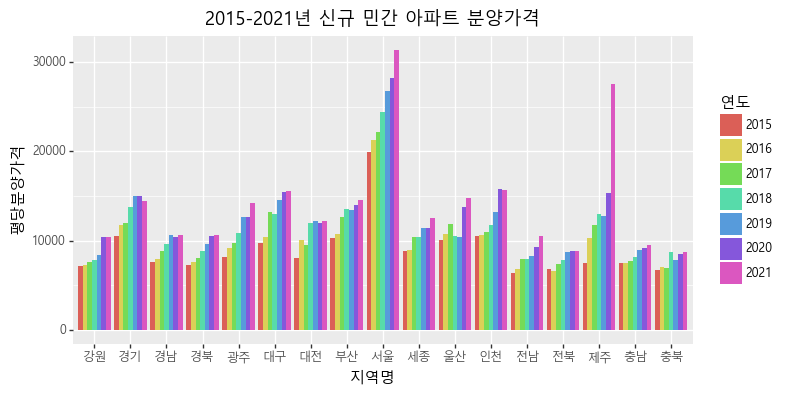

<ggplot: (147445224220)>

In [147]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2021년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='Malgun Gothic'),
         figure_size=(8, 4))
)

In [148]:

pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
모든면적,"8,041","13,031","9,100","8,568","10,787","12,762","10,214","12,439","24,053","10,274","11,323","12,275","7,826","7,634","12,846","8,145","7,497"
전용면적 102제곱미터초과,"9,642","15,200","10,376","9,695","12,348","13,977","14,875","13,340","25,180","10,460","11,523","15,112","9,054","8,422","12,200","8,960","8,455"
전용면적 60제곱미터이하,"8,273","13,480","9,007","8,516","10,320","12,818","9,819","11,966","24,677","10,017","10,920","12,211","7,634","7,851","14,199","8,109","7,420"
전용면적 60제곱미터초과 85제곱미터이하,"8,011","12,994","9,063","8,550","10,706","12,770","10,162","12,387","23,926","10,230","11,402","12,355","7,830","7,602","12,734","8,167","7,548"
전용면적 85제곱미터초과 102제곱미터이하,"8,903","14,171","11,265","9,611","11,587","12,452","9,078","12,422","28,091","10,252","9,622","12,641","8,442","8,436","10,709","9,484","8,509"


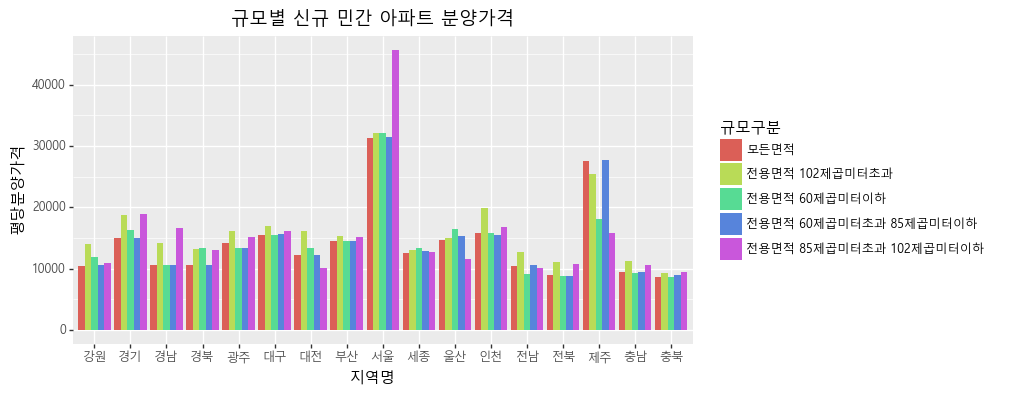

<ggplot: (147445766906)>

In [149]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='Malgun Gothic'),
         figure_size=(8, 4))
)

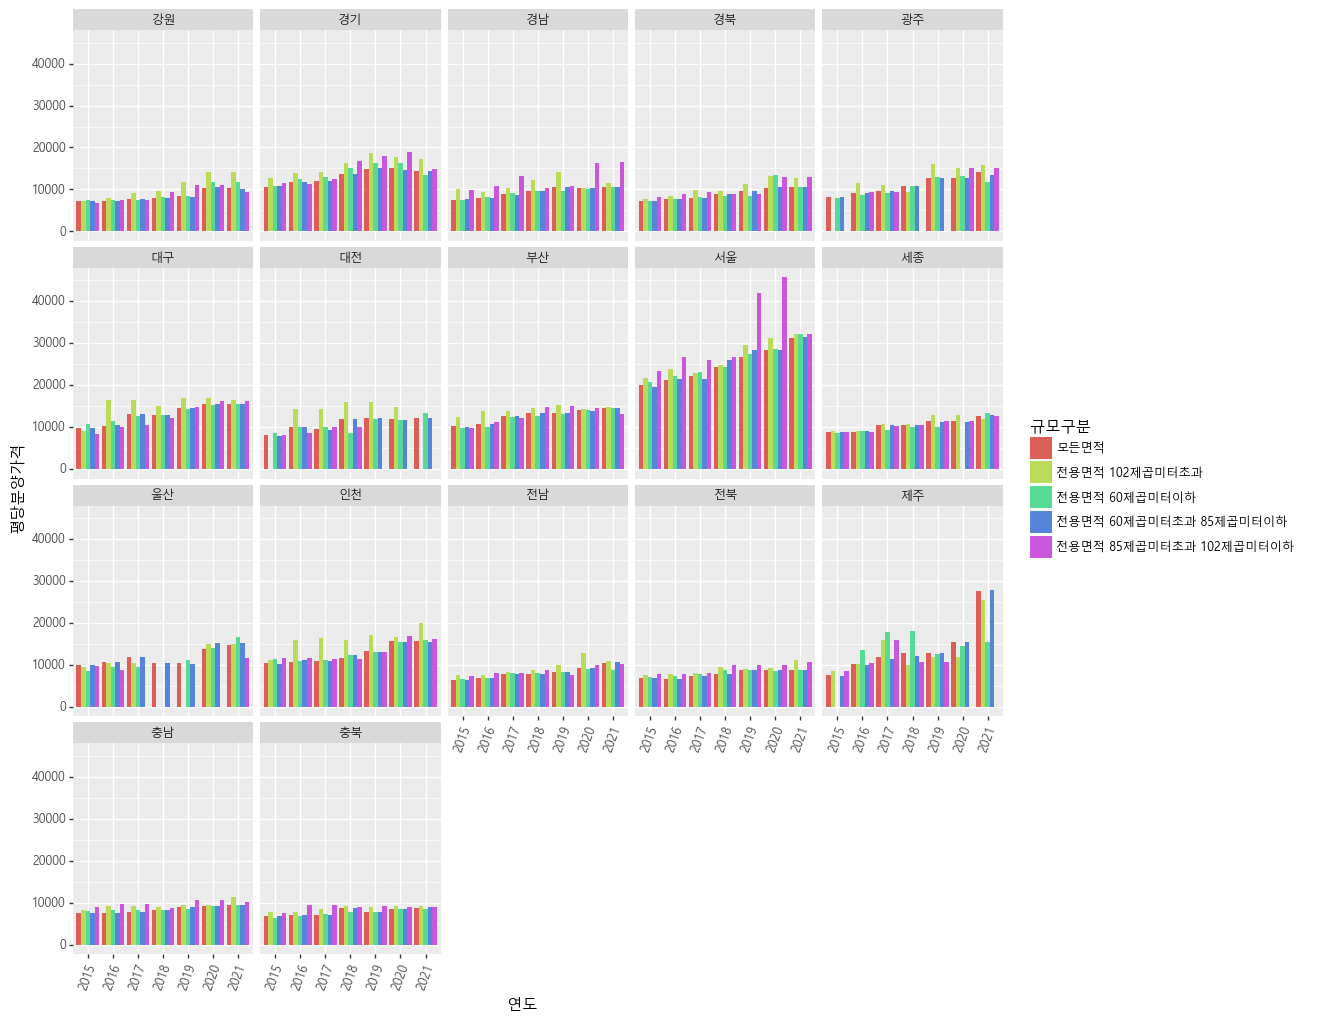

<ggplot: (147449091365)>

In [150]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='Malgun Gothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

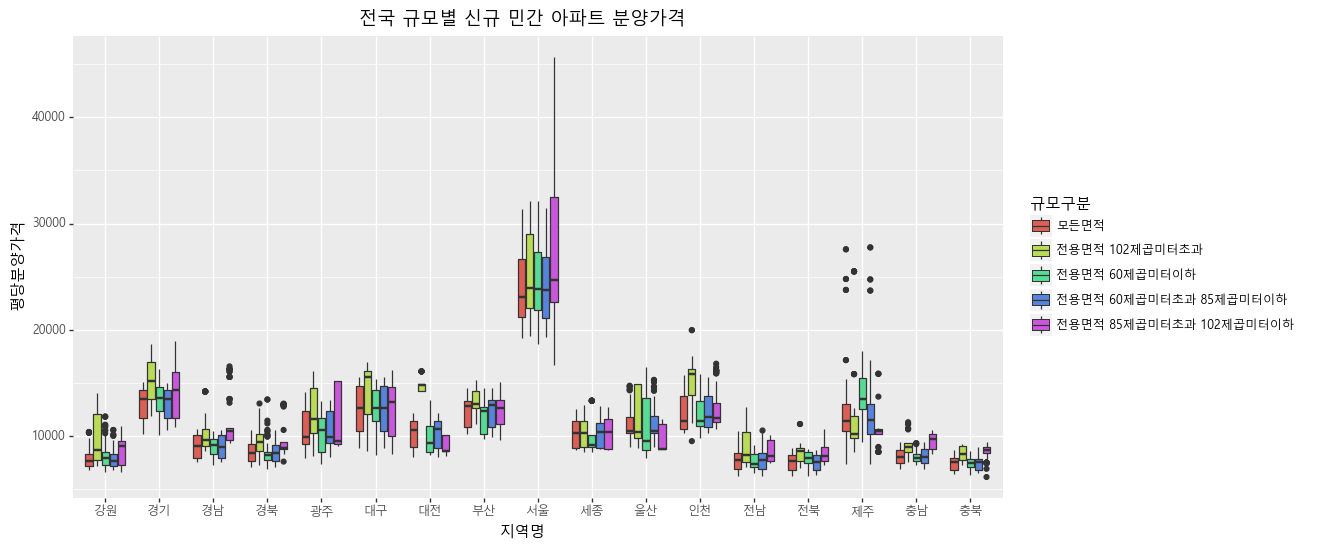

<ggplot: (147444780758)>

In [151]:
# 박스플롯을 그려봅니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='Malgun Gothic'),
         figure_size=(12, 6))
)

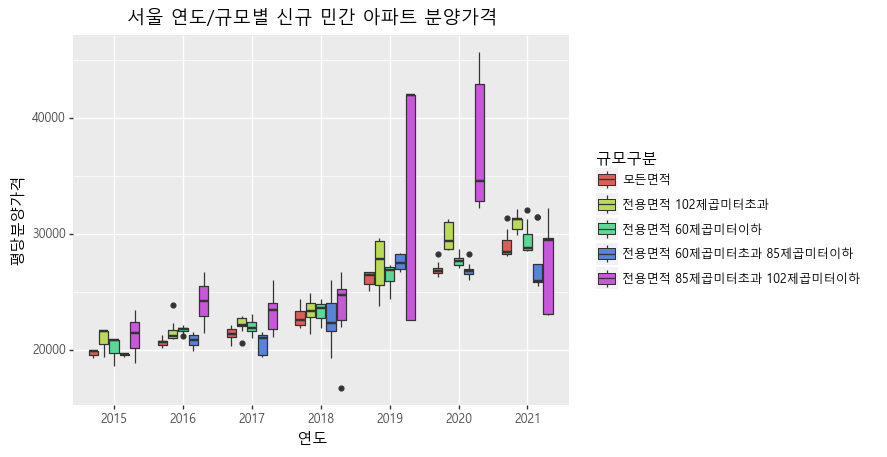

<ggplot: (147444792793)>

In [152]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

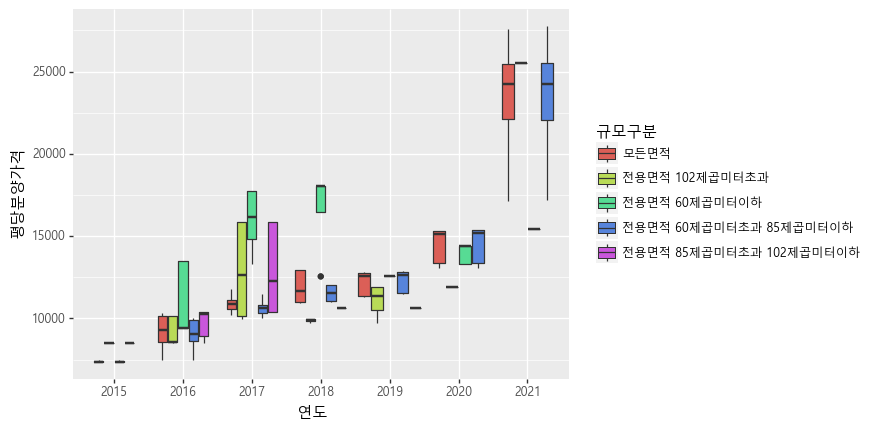

<ggplot: (147450023952)>

In [153]:
# 2015년에서 2021년까지 분양가 차이가 가장 컸던 제주 확인.
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

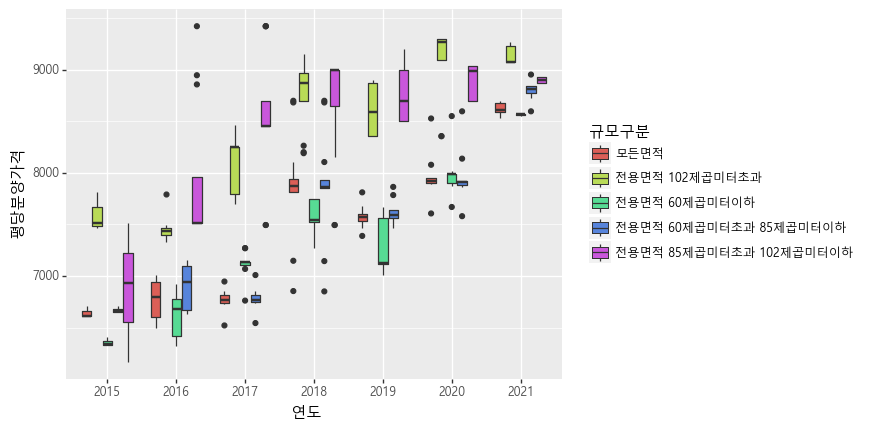

<ggplot: (147447739173)>

In [154]:
# 2015년에서 2021년까지 분양가 차이가 가장 작았던 충북을 봅니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='충북'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)